# Classification

We want to train a machine learning model that can determine the species of an iris given its measurements.
We will try a number of machine learning models, on the original feature matrix as well as on the PCA-reduced feature matrix.

In [51]:
import matplotlib.pyplot as plt

In [32]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# display the shape of the feature matrix and target vector to check
# that we have the data we expect
X.shape, y.shape

((150, 4), (150,))

First, we need to split the dataset into a training set and a test set.
scikit-learn provides a utility function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) that randomly splits a dataset.
It is one of the basic techniques for [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

In [54]:
# split the dataset in a training set and a test set
# we split the data 60-40 between train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [78]:
# TODO display the shape of X_train and y_train


In [79]:
# TODO display the shape of X_test and y_test


## Logistic regression
We start with a simple model : [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

In [58]:
from sklearn import linear_model
clf_lr = linear_model.LogisticRegression(max_iter=1000)
# fit the model to the training data
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

The learned coefficients and bias terms of the decision functions in the logistic regression model are stored in `reg.coef_` and `reg.intercept_`.
Here, the model has a vector of coefficients for each class (3 target values), with a coefficient for each feature.

In [80]:
# TODO display the coefficients


In [81]:
# TODO display the intercepts


The trained model can be used to predict the class of the samples in the test set, with the function `predict`.

In [61]:
y_test_pred = clf_lr.predict(X_test)
y_test_pred

array([1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2])

Models in scikit-learn have a `score` function that predicts values, compares the predictions with the ground truth, and returns an evaluation criterion that depends on the model (hence you need to read the documentation of each model you use !).
For linear regression, this evaluation criterion is the coefficient of determination R^2 of the prediction.

In [62]:
clf_lr.score(X_test, y_test)

0.9333333333333333

But in general, we are interested in the accuracy of the predictions, overall and by class.
For this we can use the function that builds a [classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report).
Providing the `target_names` enables to get a report with the class names instead of their encoding as integers (0, 1, 2).

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.86      0.95      0.90        19
   virginica       0.95      0.88      0.91        24

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



What are the precision, recall and f1-score for the "setosa" irises? For the "versicolor" and "virginica" ? Were you expecting these scores ?

(You probably want to answer more than just "yes" or "no".) 

We would like to know more about the samples that are misclassified between versicolor and 
virginica.
We can display a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) to know how many versicolor irises were wrongly classified as virginica, and how many virginica were wrongly classified as versicolor.

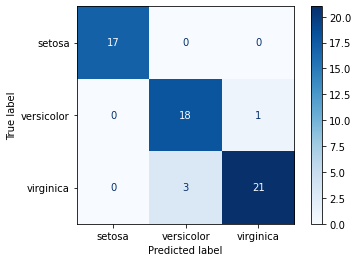

In [65]:
# plot_confusion_matrix takes the classifier and X_test, and predicts y_test_pred ;
# which it then compares to y_test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_lr, X_test, y_test,
                      display_labels=target_names,
                      cmap=plt.cm.Blues)

We saw earlier that the training-test split was randomly assigning each sample to either the training or test set.
Re-run the cell with the call to `train_test_split`, then re-run all cells between that cell and the current one.
You should see the results and confusion matrix changing ; if you do not, there might be a problem with your notebook and you should ask for assistance.

### Linear regression on the reduced dataset
The same type of classifier can be made to use the PCA reduced feature matrix instead of the original feature matrix.

We can compute the principal components of the feature matrix X_train, and project on them the two feature matrices X_train and X_test.

In [67]:
from sklearn.decomposition import PCA
# create a PCA model that will map the input data to 3 dimensions
pca = PCA(n_components=3)
# compute the principal components on the feature matrix of the training set, X_train
pca.fit(X_train)
# the PCA computed on X_train can be used to reduce the feature matrix X_train,
# but also X_test
X_r_train = pca.transform(X_train)
X_r_test = pca.transform(X_test)

We can now fit a logistic regression classifier on the reduced version of X_train.

In [68]:
clf_r_lr = linear_model.LogisticRegression(max_iter=1000)
# fit the model to the training data
clf_r_lr.fit(X_r_train, y_train)

LogisticRegression(max_iter=1000)

We fit a PCA with 3 components, so the coefs and intercepts will be quite different in the reduced feature space from what they were in the original feature space.

In [82]:
# TODO display the coefficients


In [83]:
# TODO display the intercepts


How accurate is the classifier in this reduced feature space?

In [84]:
# TODO display the score of clf_r_lr on the test set


We can check the detailed report and confusion matrix.

In [85]:
y_r_test_pred = clf_r_lr.predict(X_r_test)
# TODO display the classification report for y_r_test_pred


In [86]:
# TODO display the confusion matrix for clf_r_lr and X_r_test


The PCA enabled to reduce the dimensionality (from 4 to 3 dimensions) of the data with no loss of performance.
This is good, because it reduced the complexity and cost of fitting a classifier.
You could not really feel the impact on the small iris dataset but on bigger datasets, with a larger number of features, applying a dimensionality reduction method as a pre-processing step unlocks the usage of very complex models.

Reducing the dimensionality of a dataset can however induce a loss of information that limits the ability of a machine learning model to accurately describe the dataset and degrades its performance.
This happens when the number of dimensions in the reduced space does not enable to capture enough variance from the original data (the sum of the `explained_variance_ratio_` is too small because `n_components` is too small).
Another case where this happens, is when the most discriminative features between your classes are subtle differences that are captured by the last principal components. Preserving 90 or 95% of the variance in the original dataset is useless when the discriminative features are in the 10 or 5 remaining percents of the variance.